<a href="https://colab.research.google.com/github/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/blob/main/Filtrado_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

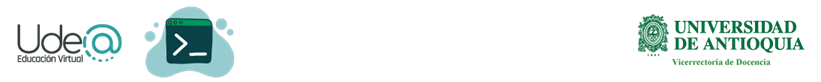

## Filtrados Lineales y No Lineales Sobre Imágenes

**Autor:** Hernán Felipe García Arias, PhD.

**Tratamiento de Señales III**

**2022-1**


This notebook shows some key componentens on image filtering. Please feel free to modify the filter parameters to evidence the different performances. The main functions in the skimage toolkit are located in: [skimage.filters](https://scikit-image.org/docs/dev/api/skimage.filters.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

In [ ]:
# Let's create some functions to display results

def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

def showPair(img,filt_img):
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_axis_off()
    ax[1].imshow(filt_img, cmap=plt.cm.gray)
    ax[1].set_axis_off()
    plt.show()

Let's load a given sample image from the [skimage dataset](https://scikit-image.org/docs/stable/api/skimage.data.html). We will use this image to perform filtering tasks such as spatial filters and nonlinear filters

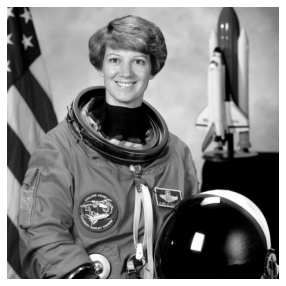

In [ ]:
img = skic.rgb2gray(skid.astronaut())
show(img)

## Spatial filtering

Let us define the discrete convolution in 2D such as

\begin{align}g[x]=f[x] * h=\sum_{\boldsymbol{\tau} \in \Omega} f[x-\boldsymbol{\tau}] h[\boldsymbol{\tau}]
\end{align}

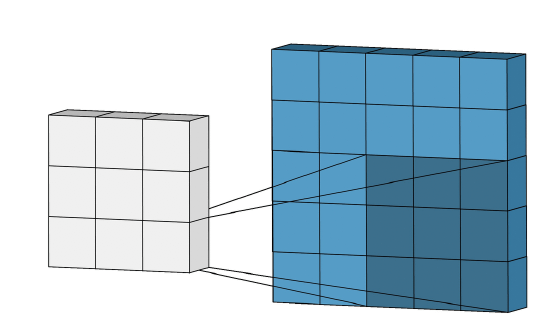

La convolución se define para imágenes infinitamente grandes.
**Problem**
* Since discrete images a finit elemente array. The convolution kernel do no support information in their limits (edges).


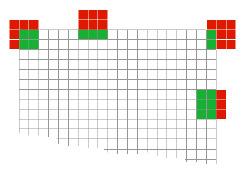

This could be overcomed by using padding information
- Ignoring borders
- Mirroring
- Envelopment

### Gaussian Filter

[Gauss filter usage](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian)

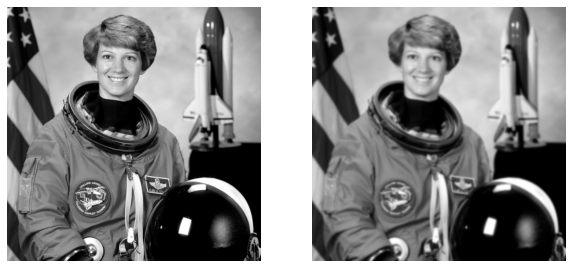

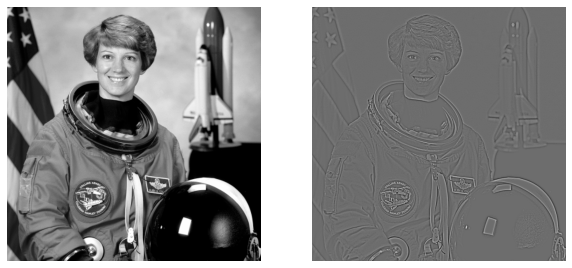

In [ ]:
import matplotlib.pyplot as plt
imgLP_Gauss = skif.gaussian(img, 1.5)
showPair(img,imgLP_Gauss)

# Un filtro pasa alto a partir de un pasa bajo
imgHP_AfterSmoothing = img - imgLP_Gauss
showPair(img,imgHP_AfterSmoothing)

## Sharpening Filter

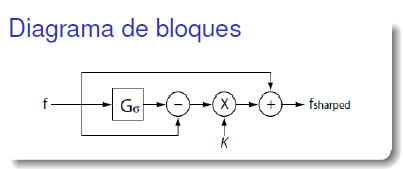

In [ ]:
from ipywidgets import interact

In [ ]:
@interact(Sigma =(0.05,10.,0.05),K=[0.5,1.,5.,10.,20])

def sharpExperiment(Sigma,K):
  img = skic.rgb2gray(skid.astronaut())
  imgLP_Gauss = skif.gaussian(img, Sigma)
  HP_fromLP = img - imgLP_Gauss
  # Sharpening Filter
  # F_sharped = f + K(f - G*f)
  f_sharped = img + K*HP_fromLP
  showPair(img,f_sharped)

interactive(children=(FloatSlider(value=5.0, description='Sigma', max=10.0, min=0.05, step=0.05), Dropdown(des…

The above figures shows the experimental results on wich from a low-pass filtered image (upper right corner), we can notice that Gaussian kernel performs an image smoothing.

Then, by substracting the resulting image from the original we can compute an enhance image in their edges

### Sobel filter

[Sobel filter usage](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel)

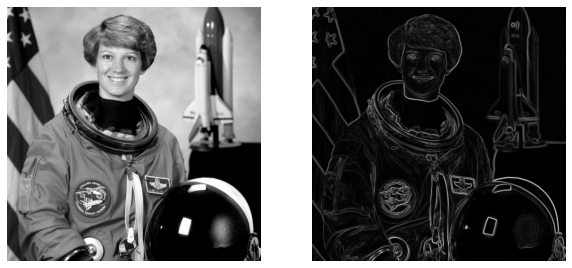

In [ ]:
sobimg = skif.sobel(img)
showPair(img,sobimg)

## High-Pass Filters

High-Pass Filters enhance high transition between intensity values calle *edges*. In the following interactive cell, we can show how an umbralization for a given edge value. If a low value is selected, the more edges are retained.

In [ ]:
from ipywidgets import widgets

@widgets.interact(x=(0.01, .2, .005))
def edge(x):
    show(sobimg < x)

interactive(children=(FloatSlider(value=0.105, description='x', max=0.2, min=0.01, step=0.005), Output()), _do…

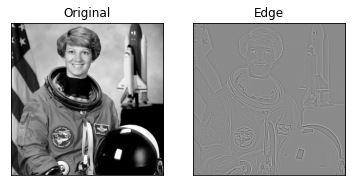

In [ ]:
## High pass Laplacian Filter
import cv2

edge = cv2.Laplacian(img, -1, ksize=5, scale=1, delta=0,
            borderType=cv2.BORDER_DEFAULT)

outputs = [img, edge]

titles = ['Original', 'Edge']

for i in range(2):
  plt.subplot(1, 2, i+1) 
  plt.imshow(outputs[i],cmap='gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  after removing the cwd from sys.path.


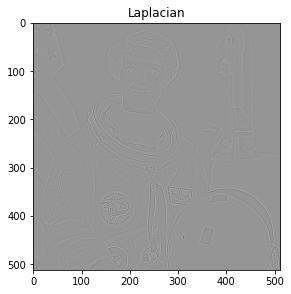

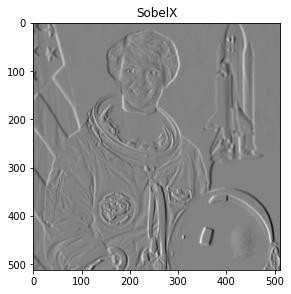

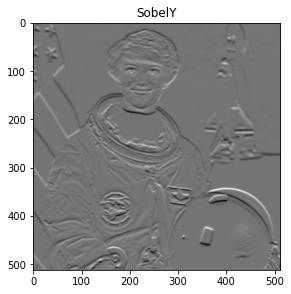

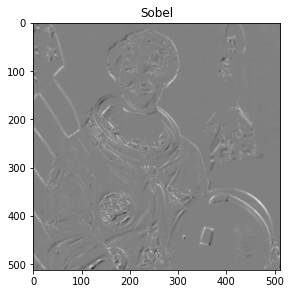

In [ ]:
# Another HP Filters
# convert image to gray scale image
from skimage.color import rgb2gray
gray = rgb2gray(img)
 

# apply laplacian blur
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
 
# sobel x filter where dx=1 and dy=0
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=7)
 
# sobel y filter where dx=0 and dy=1
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=7)
 
# combine sobel x and y
sobel = cv2.bitwise_and(sobelx, sobely)
 
# plot images
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('SobelX')
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 3)
plt.imshow(sobely, cmap='gray')
plt.title('SobelY')
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 4)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel')
 
plt.show()

## Noise reduction

Let's us disturb the input image with some random noise $\mathcal{N}(0,\sigma^2)$



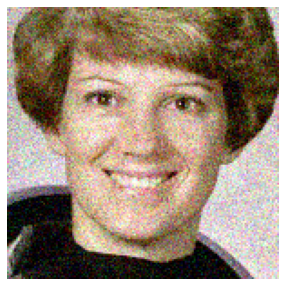

In [ ]:
img = skimage.img_as_float(skid.astronaut())

# We take a portion of the image to show the details.
img = img[50:200, 150:300]

# We add Gaussian noise.
img_n = sku.random_noise(img)
show(img_n)

### Image resotarion

For [image restoration](https://scikit-image.org/docs/dev/api/skimage.restoration.html), Skimage has several approaches. 

An interesting filter is to [Perform a total-variation denoising using split-Bregman optimization.](https://scikit-image.org/docs/dev/api/skimage.restoration.html#skimage.restoration.denoise_tv_bregman)

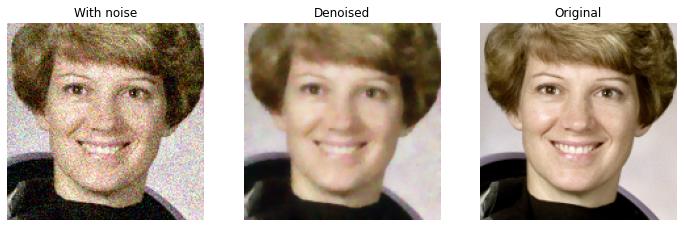

In [ ]:
img_r = skimage.restoration.denoise_tv_bregman(
    img_n, 5.)

fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12, 8))

ax1.imshow(img_n)
ax1.set_title('With noise')
ax1.set_axis_off()

ax2.imshow(img_r)
ax2.set_title('Denoised')
ax2.set_axis_off()

ax3.imshow(img)
ax3.set_title('Original')
ax3.set_axis_off()

The results show that non-linear approaches such as total-variation can effitiently

### References

1. R.R. Coifman and D.L. Donoho. “Translation-Invariant De-Noising”. Wavelets and Statistics, Lecture Notes in Statistics, vol.103. Springer, New York, 1995, pp.125-150. DOI:10.1007/978-1-4612-2544-7_9.
2. Tom Goldstein and Stanley Osher, “The Split Bregman Method For L1 Regularized Problems”, ftp://ftp.math.ucla.edu/pub/camreport/cam08-29.pdf3 
3. Pascal Getreuer, “Rudin–Osher–Fatemi Total Variation Denoising using Split Bregman” in Image Processing On Line on 2012–05–19, 
4. https://www.ipol.im/pub/art/2012/g-tvd/article_lr.pdf4 https://web.math.ucsb.edu/~cgarcia/UGProjects/BregmanAlgorithms_JacquelineBush.pdf